# Proyecto Final Ciencia de Datos con Python 

## Estuardo Funes Solares Carné 20032042

### Importar paquetes para Proyecto

In [989]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [990]:
!pip install scikit-learn

In [991]:
import sklearn as sl

In [992]:
# CONSTANTES
LEARNING_RATE = 0.0001
EPOCH = 5

### Carga de Datos para Analizar

###### https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

In [993]:
df_training_data = np.load('./proyecto_training_data.npy')

In [994]:
df_training_data
### https://drive.google.com/file/d/1Y5vA7xxk68rjhon6_SJCIqhDn2mIyBZU/view?usp=sharing

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [995]:
df_training_data.shape
# Para verificar cómo es la forma de mi set de datos de entrenamiento, en este caso 1460 filas y 6 columnas

(1460, 6)

In [996]:
print (df_training_data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [997]:
df = pd.DataFrame (df_training_data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#Se convierte en un DataFrame y se agregan columnas

In [998]:
df.info()
#Información de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [999]:
print (df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [1000]:
df.head(10)
#Ver una muestra de los primeros registros

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


In [1001]:
df.describe()
#estadística general del DataFrame

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Análisis Exploratorio de Datos

In [1002]:
df_datos_entrenamiento = df.sample(frac=0.8)
df_datos_entrenamiento = df[0:1169]
df_datos_pruebas = df.sample(frac=0.2)
print('datos de entrenamiento:', len(df_datos_entrenamiento))
print('datos de prueba:', len(df_datos_pruebas))

datos de entrenamiento: 1169
datos de prueba: 292


In [1003]:
df_datos_entrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


In [1004]:
df_datos_entrenamiento.describe()
#Estadística General de mi Set de Datos de entrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,963.000000
mean,180636.821215,6.100941,1156.391788,6.485885,1971.420017,69.998962
std,78798.021880,1.377438,373.627599,1.608522,29.957858,23.521322
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.000000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [1005]:
df_datos_pruebas.describe()
#Estadística General de mi Set de Datos de Pruebas

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,249.000000
mean,185550.489726,6.246575,1184.017123,6.465753,1972.191781,71.694779
std,92397.280895,1.457587,450.168754,1.725748,30.574975,28.079295
min,37900.000000,3.000000,483.000000,3.000000,1880.000000,21.000000
25%,128000.000000,5.000000,864.000000,5.000000,1955.000000,60.000000
50%,164200.000000,6.000000,1095.000000,6.000000,1975.000000,70.000000
75%,219625.000000,7.000000,1443.250000,7.000000,2001.000000,85.000000
max,745000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


In [1006]:
df_datos_entrenamiento['SalePrice'].describe()

count      1169.000000
mean     180636.821215
std       78798.021880
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Histogramas de cada una de las Variables

###### https://seaborn.pydata.org/generated/seaborn.distplot.html

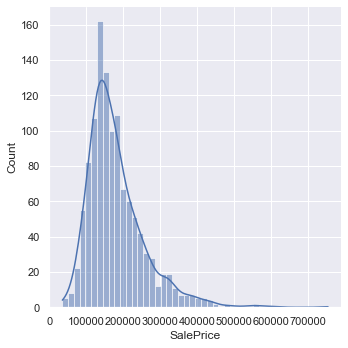

In [1007]:
sns.displot(df_datos_entrenamiento['SalePrice'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1008]:
df_datos_entrenamiento['OverallQual'].describe()

count    1169.000000
mean        6.100941
std         1.377438
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

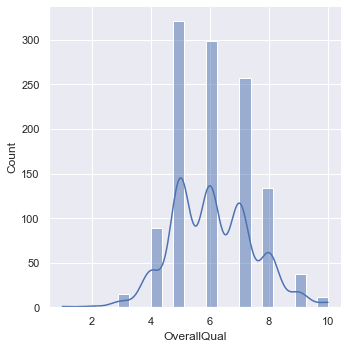

In [1009]:
sns.displot(df_datos_entrenamiento['OverallQual'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1010]:
df_datos_entrenamiento['1stFlrSF'].describe()

count    1169.000000
mean     1156.391788
std       373.627599
min       334.000000
25%       882.000000
50%      1086.000000
75%      1390.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

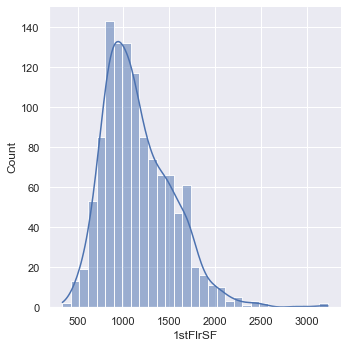

In [1011]:
sns.displot(df_datos_entrenamiento['1stFlrSF'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1012]:
df_datos_entrenamiento['TotRmsAbvGrd'].describe()

count    1169.000000
mean        6.485885
std         1.608522
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

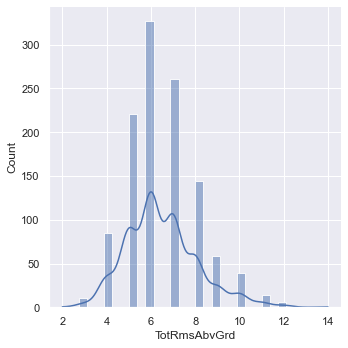

In [1013]:
sns.displot(df_datos_entrenamiento['TotRmsAbvGrd'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1014]:
df_datos_entrenamiento['YearBuilt'].describe()

count    1169.000000
mean     1971.420017
std        29.957858
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

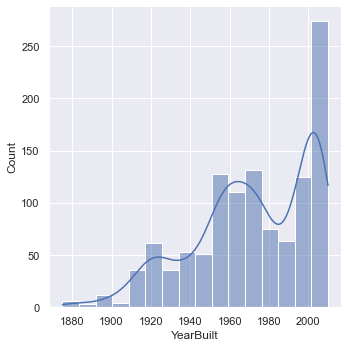

In [1015]:
sns.displot(df_datos_entrenamiento['YearBuilt'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1016]:
df_datos_entrenamiento['LotFrontage'].describe()

count    963.000000
mean      69.998962
std       23.521322
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

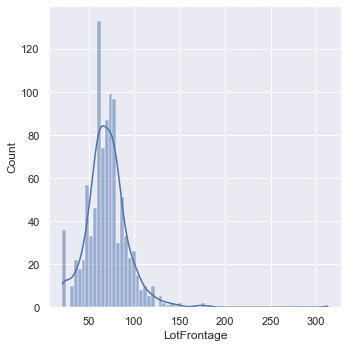

In [1017]:
sns.displot(df_datos_entrenamiento['LotFrontage'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [1018]:
df_datos_entrenamiento.ndim

2

In [1019]:
df_datos_entrenamiento.shape

(1169, 6)

In [1020]:
len(df_datos_entrenamiento.shape)

2

In [1021]:
SalePrice_OverallQual = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['OverallQual']], axis=1)

In [1022]:
SalePrice_OverallQual

,SalePrice,OverallQual
0,208500.0,7.0
1,181500.0,6.0
2,223500.0,7.0
3,140000.0,7.0
4,250000.0,8.0
...,...,...
1164,194000.0,5.0
1165,233170.0,7.0
1166,245350.0,8.0
1167,173000.0,6.0


### Gráficas de cada una de las "X" vrs "Y" para ver Coeficiente de Correlación

Text(0.5, 1.0, '0.7937829677609731')

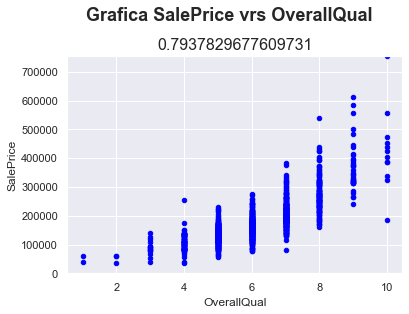

In [1023]:
Correlacion1 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["OverallQual"])
SalePrice_OverallQual.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs OverallQual")
#plt.suptitle('$\it{Grafica SalePrice vrs OverallQual}$', fontsize = 12)
#plt.title(Correlacion[0,1], fontsize = 12)
#plt.suptitle('$\it{Grafica SalePrice vrs OverallQual}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs OverallQual', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion1[0,1], fontsize=16)

In [1024]:
SalePrice_1stFlrSF = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['1stFlrSF']], axis=1)

Text(0.5, 1.0, '0.6162769848463839')

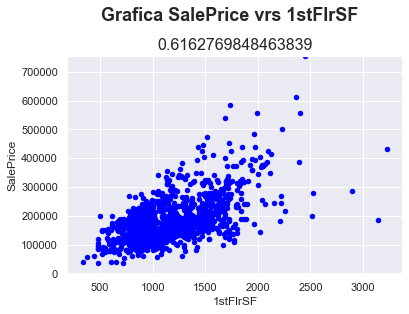

In [1025]:
Correlacion2 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["1stFlrSF"])
SalePrice_1stFlrSF.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs 1stFlrSF")
#plt.suptitle('$\it{Grafica SalePrice vrs 1stFlrSF}$', fontsize = 12)
#plt.title(Correlacion2[0,1], fontsize = 12)
#plt.suptitle('$\it{Grafica SalePrice vrs 1stFlrSF}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs 1stFlrSF', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion2[0,1], fontsize=16)

Text(0.5, 1.0, '0.5647560082444895')

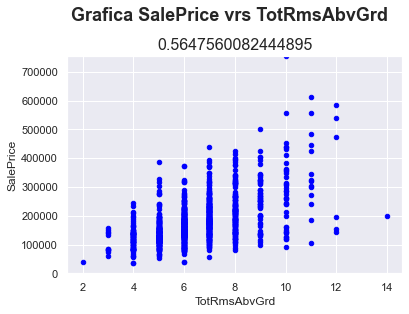

In [1026]:
Correlacion3 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["TotRmsAbvGrd"])
SalePrice_TotRmsAbvGrd = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['TotRmsAbvGrd']], axis=1)
SalePrice_TotRmsAbvGrd.plot.scatter(x='TotRmsAbvGrd', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs TotRmsAbvGrd")
#plt.suptitle('$\it{Grafica SalePrice vrs TotRmsAbvGrd}$', fontsize = 12)
#plt.title(Correlacion3[0,1], fontsize = 12)
#plt.suptitle('$\it{Grafica SalePrice vrs TotRmsAbvGrd}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs TotRmsAbvGrd', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion3[0,1], fontsize=16)

Text(0.5, 1.0, '0.5330047607874274')

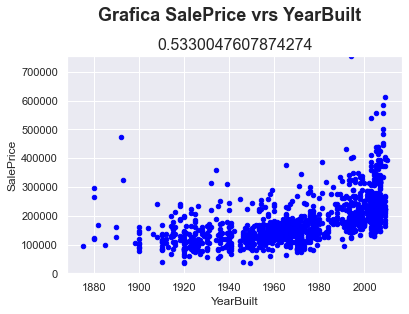

In [1027]:
Correlacion4 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["YearBuilt"])
SalePrice_YearBuilt = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['YearBuilt']], axis=1)
SalePrice_YearBuilt.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs YearBuilt")
#plt.suptitle('$\it{Grafica SalePrice vrs YearBuilt}$', fontsize = 12)
#plt.title(Correlacion4[0,1], fontsize = 12)
#plt.suptitle('$\it{Grafica SalePrice vrs YearBuilt}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs YearBuilt', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion4[0,1], fontsize=16)

Text(0.5, 1.0, 'nan')

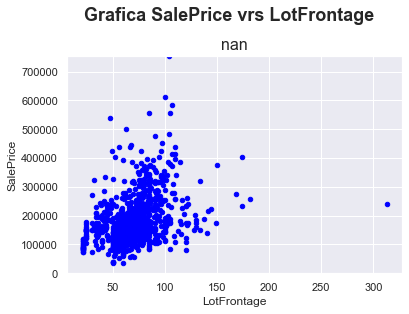

In [1028]:
Correlacion5 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["LotFrontage"])
SalePrice_LotFrontage = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['LotFrontage']], axis=1)
SalePrice_LotFrontage.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs LotFrontage")
#plt.suptitle('$\it{Grafica SalePrice vrs LotFrontage}$', fontsize = 16)
#plt.title(Correlacion5[0,1])
#plt.suptitle('$\it{Grafica SalePrice vrs LotFrontage}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs LotFrontage', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion5[0,1], fontsize=16)

In [1029]:
### Como podemos ver en la gráfica, en la última variable "LotFrontage" existe valores Not a Number (NAN)

In [1030]:
df_datos_entrenamiento.isnull().sum()
# Podemos confirmar lo que nos dice la gráfica, en la última variable existen valores no numéricos (NAN)

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     206
dtype: int64

In [1031]:
### Se sustituyen valores Not a Number (NAN) por el promedio de dicha variable, el cual es 69.99

In [1032]:
no_nan_entrenamiento=df_datos_entrenamiento.replace(np.nan,69.99)
df_datos_entrenamiento = pd.DataFrame(no_nan_entrenamiento)
df_datos_entrenamiento.isnull().sum()

SalePrice       0
OverallQual     0
1stFlrSF        0
TotRmsAbvGrd    0
YearBuilt       0
LotFrontage     0
dtype: int64

In [1033]:
# Volvemos a generar la gráfica y ya nos sale con su respectiva valor de correlación

Text(0.5, 1.0, '0.3490443532552947')

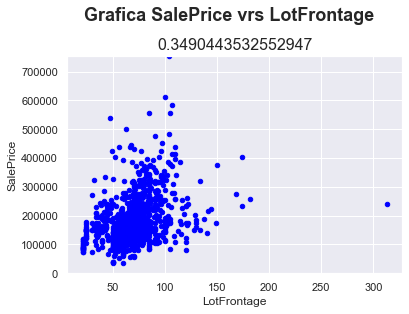

In [1034]:
Correlacion5 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["LotFrontage"])
SalePrice_LotFrontage = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['LotFrontage']], axis=1)
SalePrice_LotFrontage.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs LotFrontage")
#plt.suptitle('$\it{Grafica SalePrice vrs LotFrontage}$', fontsize = 16)
#plt.title(Correlacion5[0,1])
#plt.suptitle('$\it{Grafica SalePrice vrs LotFrontage}$', y=1.05, fontsize=18) 
plt.suptitle('Grafica SalePrice vrs LotFrontage', size = 18, y=1.05, fontweight='bold')
plt.title(Correlacion5[0,1], fontsize=16)

##### Coeficiente de Correlación

In [1035]:
correlacion = df_datos_entrenamiento.corr()

In [1036]:
correlacion
# el valor de LotFrontage es diferente porque utilizando la función df.corr() omite los NAN 
# y en la gráfica anterior los sustituimos por el valor promedio

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793783,0.616277,0.564756,0.533005,0.349044
OverallQual,0.793783,1.000000,0.469388,0.444252,0.567029,0.225701
1stFlrSF,0.616277,0.469388,1.000000,0.409351,0.291662,0.377089
TotRmsAbvGrd,0.564756,0.444252,0.409351,1.000000,0.122495,0.311074
YearBuilt,0.533005,0.567029,0.291662,0.122495,1.000000,0.113346
LotFrontage,0.349044,0.225701,0.377089,0.311074,0.113346,1.000000


### Las 2 Variables con el Coeficiente de Correlación mayor son: 

#### 1.) SalePrice con OverallQual con: 
### **"0.7937"**
#### 2.) SalePrice con 1stFlrSF con: 
### **"0.6162"**

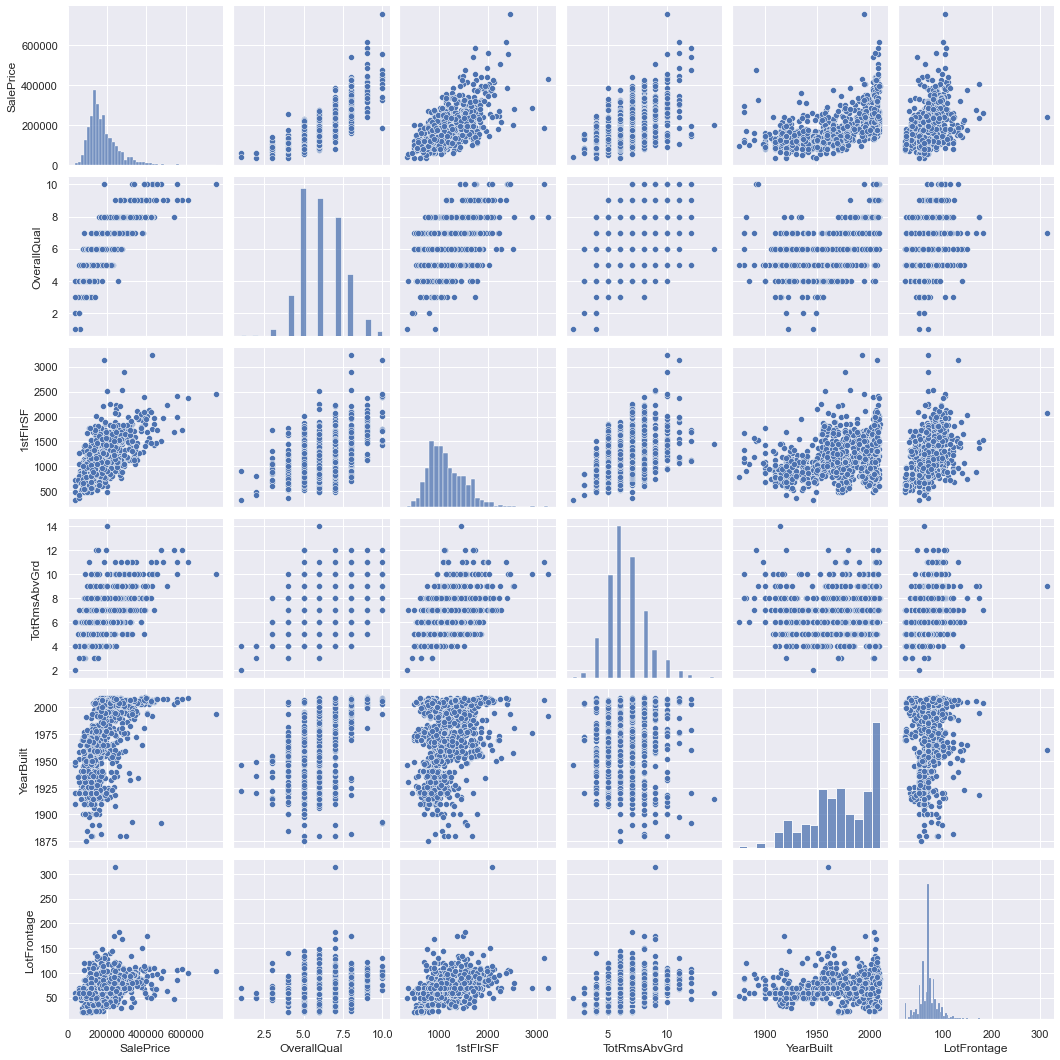

In [1037]:
sns.set()
sns.pairplot(df_datos_entrenamiento, height = 2.5)
## Se utiliza "height" porque sale un Warning: The size parameter has been renamed to "height"
plt.show();

In [1043]:
r = np.corrcoef(df_datos_entrenamiento["SalePrice"], df_datos_entrenamiento["OverallQual"])
r

array([[1.        , 0.79378297],
       [0.79378297, 1.        ]])

In [1044]:
x_entrenar = df_datos_entrenamiento["OverallQual"]
y_entrenar = df_datos_entrenamiento["SalePrice"]

matriz_x = np.vstack(( np.matrix(x_entrenar), np.ones((1169,)) ))
matriz_y = np.vstack(( np.matrix(y_entrenar), np.ones((1169,)) ))


matrix_x = matriz_x.transpose()
matrix_x

matrix([[7., 1.],
        [6., 1.],
        [7., 1.],
        ...,
        [8., 1.],
        [6., 1.],
        [6., 1.]])

In [1045]:
b, m, error = regresion_lineal(x_entrenar, y_entrenar)


0.07245434819460356 180636.37917501168


TypeError: cannot unpack non-iterable NoneType object

In [1046]:
b

-96402.70790640751

In [1047]:
m

45409.31148942658

In [1048]:
error

2294845174.869699

In [1049]:

x = x_entrenar
y = y_entrenar

In [1050]:
# Calcular media de set de entrenamiento
media_X = x.mean()
media_Y = y.mean()
    

In [1051]:
# Calcular pendiente
m = sum( (x-media_X)*(y-media_Y) ) / sum( ((x - media_X) ** 2) ) 
    
    
# Calcular intesección
b = (media_Y - (m * media_X))
    
# vector parametros
parametros = [m, b]

In [1052]:
# Matrix de x con unos
matriz_x = np.vstack((x, np.ones((1169,)) ))

In [1053]:
# Predicción
# yhat = np.dot(matriz_x, parametros)
yhat = np.dot(matriz_x.transpose(), parametros)
yhat.shape

(1169,)

In [1054]:
yhat

array([221462.47251958, 176053.16103015, 221462.47251958, ...,
       266871.78400901, 176053.16103015, 176053.16103015])

In [1055]:
# Error MSE
calcular_error = []
error = sum( (y - yhat)**2 ) / len(y)
calcular_error.append(error)
calcular_error

[2294845174.869699]

In [1056]:
gradientes = [np.mean( (yhat -y) * x ), np.mean( (yhat - y ) * 1 ) ]
gradientes

[3.178765673837262e-10, 3.0124580712273552e-12]

In [1057]:
parametros[0]
parametros[1]

-96402.70790640751

In [1058]:
parametros
LEARNING_RATE
m1 =  parametros[0] - LEARNING_RATE * gradientes[0]
b1 =  parametros[1] - LEARNING_RATE * gradientes[1]

print([m1, b1])

[45409.31148942658, -96402.70790640751]


In [1059]:
tdict = {}
tdict[1] = parametros
tdict

{1: [45409.31148942658, -96402.70790640751]}

In [1060]:
# Obtener nuevos parametros
parametros = np.multiply(gradientes, LEARNING_RATE) - parametros

In [1061]:
def regresion_lineal(x, y, epochs, imprimir_error_cada, lr):
    errores_dict = {}
    modelos_dict = {}
    yhat = 0
        
    # Calcular media de set de entrenamiento
    media_X = x.mean()
    media_Y = y.mean()
    
   # Calcular pendiente
    m = sum( (x-media_X)*(y-media_Y) ) / sum( ((x - media_X) ** 2) ) 

    # Calcular intesección
    b = (media_Y - (m * media_X))

    # vector parametros
    parametros = [m, b]

    # Matrix de x con unos
    matriz_x = np.vstack((x, np.ones((1169,)) ))
    matriz_x = matriz_x.transpose()
    
    for i in range(epochs):
        # Predicción
        yhat = np.dot(matriz_x, parametros)
        
        # Version 2
        # yhat = ( parametros[0] * x ) + parametros[1]

        # Error MSE
        error = sum( np.square( (y - yhat) ) ) / len(y)
        
        # Version 2
        # error = 0.5 * np.mean( (y - yhat)**2 )
        
        errores_dict[i] = error

        # gradientes
        gradientes = [np.mean( (yhat -y) * x ), np.mean( (yhat - y ) * 1 ) ]
        
        # print(gradientes)

        # Guardar parametros de iteración actual antes de calcular nuevos parametros
        modelos_dict[i] = parametros

        # Obtener nuevos parametros
        parametros = np.multiply(gradientes, LEARNING_RATE) - parametros
        
        # version 2 nuevos parametros
        # m = parametros[0] - ( LEARNING_RATE * gradientes[0] )
        # b = parametros[1] - ( LEARNING_RATE * gradientes[1] )
        #parametros = [m, b]
        
        # print('parametros', m, b)
        
        # print(yhat[1])
    return modelos_dict, errores_dict

In [1062]:
modelos, calcular_error = regresion_lineal(x_entrenar, y_entrenar, 9, 1, LEARNING_RATE)

In [1063]:
modelos

{0: [45409.31148942658, -96402.70790640751],
 1: array([-45409.31148943,  96402.70790641]),
 2: array([ 45171.68396453, -96438.83527065]),
 3: array([-45172.63553783,  96438.68668276]),
 4: array([ 44935.95577329, -96474.66605453]),
 5: array([-44937.85130928,  96474.37006718]),
 6: array([ 44702.11172499, -96510.20263014]),
 7: array([-44704.94367394,  96509.76042226]),
 8: array([ 44470.13675041, -96545.44735061])}

In [1064]:
calcular_error

{0: 2294845174.869699,
 1: 148449376250.6724,
 2: 2297160055.82554,
 3: 147300861838.62662,
 4: 2304030789.831248,
 5: 146166070786.23224,
 6: 2315348061.2893257,
 7: 145044821039.7754,
 8: 2331004589.9868655}

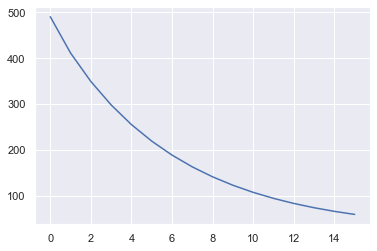

In [1065]:
# funcion de error
datos_prueba_error = {0: 490.30550369702013, 1: 411.20824165733296, 2: 349.25813564326677, 3: 298.1863054705321, 4: 255.38826145650143, 5: 219.34061356133492, 6: 188.92822564233214, 7: 163.25388363090846, 8: 141.57227729962202, 9: 123.25804381370438, 10: 107.7848022950795, 11: 94.70900649881223, 12: 83.65673802555814, 13: 74.31269181152038, 14: 66.41093342215102, 15: 59.72712740712429} 

def plot_errores(vector_errores):
    ejes = sorted( datos_prueba_error.items() )
    eje_X, eje_Y = zip(*ejes)
    plt.plot(eje_X, eje_Y)
    plt.show()
    
plot_errores(datos_prueba_error)

### Modelo con Scikit Learn

In [1066]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
df_sl = pd.DataFrame (df_training_data,columns=['SalePrice','OverallQual','_1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [1067]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#### Utilizando la primera Variable **"OverallQual"**

In [1068]:
X_train, X_test, Y_train, Y_test= train_test_split(df_sl.OverallQual.values.reshape(-1,1), df.SalePrice.values, test_size=0.20, random_state=42)

In [1069]:
X_train.shape

(1168, 1)

In [1070]:
X_test.shape

(292, 1)

In [1071]:
Y_train.shape

(1168,)

In [1072]:
Y_test.shape

(292,)

In [1073]:
from sklearn.linear_model import LinearRegression

In [1074]:
regresion_lineal_sl = LinearRegression()

In [1075]:
regresion_lineal_sl.fit(X=X_train, y=Y_train)

LinearRegression()

In [1076]:
regresion_lineal_sl.coef_

array([44379.87767098])

In [1077]:
regresion_lineal_sl.intercept_

-90233.22290028076

In [1078]:
prediccion = regresion_lineal_sl.predict(X_train)

In [1079]:
esperado = Y_train

In [1080]:
for p,e in zip(prediccion[::50],esperado[::50]):
    print(f'Prediccion: {p:.2f}, Esperado:{e:.2f}')

Prediccion: 131666.17, Esperado:145000.00
Prediccion: 131666.17, Esperado:160000.00
Prediccion: 176046.04, Esperado:128000.00
Prediccion: 220425.92, Esperado:212000.00
Prediccion: 220425.92, Esperado:213000.00
Prediccion: 264805.80, Esperado:290000.00
Prediccion: 131666.17, Esperado:172000.00
Prediccion: 220425.92, Esperado:224500.00
Prediccion: 220425.92, Esperado:200000.00
Prediccion: 176046.04, Esperado:185000.00
Prediccion: 131666.17, Esperado:125000.00
Prediccion: 220425.92, Esperado:236000.00
Prediccion: 131666.17, Esperado:120000.00
Prediccion: 131666.17, Esperado:154000.00
Prediccion: 176046.04, Esperado:224000.00
Prediccion: 87286.29, Esperado:80000.00
Prediccion: 131666.17, Esperado:190000.00
Prediccion: 220425.92, Esperado:207500.00
Prediccion: 264805.80, Esperado:235128.00
Prediccion: 176046.04, Esperado:163000.00
Prediccion: 131666.17, Esperado:150500.00
Prediccion: 176046.04, Esperado:154000.00
Prediccion: 131666.17, Esperado:112500.00
Prediccion: 309185.68, Esperado:2660

In [1081]:
predice = (lambda x:regresion_lineal_sl.coef_*x + regresion_lineal_sl.intercept_)

In [1082]:
predice (8)

array([264805.79846758])

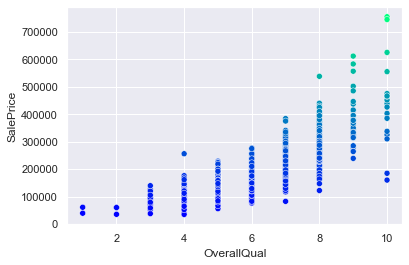

In [1083]:
axes = sns.scatterplot (data = df, x='OverallQual', y='SalePrice', hue = "SalePrice", palette='winter', legend=False)
x = np.array([min(df.OverallQual.values),max(df.OverallQual.values)])

#### Utilizando la segunda Variable **"1stFlrSF"**

In [1084]:
X_train, X_test, Y_train, Y_test= train_test_split(df_sl._1stFlrSF.values.reshape(-1,1), df.SalePrice.values, test_size=0.20, random_state=42)

In [1085]:
X_train.shape

(1168, 1)

In [1086]:
X_test.shape

(292, 1)

In [1087]:
Y_train.shape

(1168,)

In [1088]:
Y_test.shape

(292,)

In [1089]:
regresion_lineal_sl2 = LinearRegression()

In [1090]:
regresion_lineal_sl2.fit(X=X_train, y=Y_train)

LinearRegression()

In [1091]:
regresion_lineal_sl2.coef_

array([117.46802071])

In [1092]:
regresion_lineal_sl2.intercept_

44079.78895634343

In [1093]:
prediccion2 = regresion_lineal_sl2.predict(X_train)

In [1094]:
esperado2 = Y_train

In [1095]:
for p,e in zip(prediccion2[::50],esperado2[::50]):
    print(f'Prediccion2: {p:.2f}, Esperado2:{e:.2f}')

Prediccion2: 198432.77, Esperado2:145000.00
Prediccion2: 155439.47, Esperado2:160000.00
Prediccion2: 156614.15, Esperado2:128000.00
Prediccion2: 141225.84, Esperado2:212000.00
Prediccion2: 235552.66, Esperado2:213000.00
Prediccion2: 200077.32, Esperado2:290000.00
Prediccion2: 181282.44, Esperado2:172000.00
Prediccion2: 143457.73, Esperado2:224500.00
Prediccion2: 204071.23, Esperado2:200000.00
Prediccion2: 213468.67, Esperado2:185000.00
Prediccion2: 247064.53, Esperado2:125000.00
Prediccion2: 168830.83, Esperado2:236000.00
Prediccion2: 151210.62, Esperado2:120000.00
Prediccion2: 168595.89, Esperado2:154000.00
Prediccion2: 236727.34, Esperado2:224000.00
Prediccion2: 118084.64, Esperado2:80000.00
Prediccion2: 229914.20, Esperado2:190000.00
Prediccion2: 183866.73, Esperado2:207500.00
Prediccion2: 229679.26, Esperado2:235128.00
Prediccion2: 192206.96, Esperado2:163000.00
Prediccion2: 166246.53, Esperado2:150500.00
Prediccion2: 141460.78, Esperado2:154000.00
Prediccion2: 147686.58, Esperado2

In [1096]:
predice2 = (lambda x:regresion_lineal_sl2.coef_*x + regresion_lineal_sl2.intercept_)

In [1097]:
predice2 (1150)

array([179168.01277718])

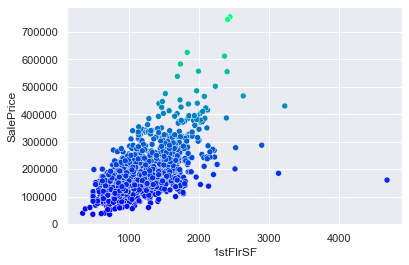

In [1098]:
axes = sns.scatterplot (data = df, x='1stFlrSF', y='SalePrice', hue = "SalePrice", palette='winter', legend=False)

### Usando 20% de los datos de validación en Modelo Scikit Learn

##### OverallQual

In [1099]:
regresion_lineal_sl.fit(X=X_test, y=Y_test)

LinearRegression()

In [1100]:
regresion_lineal_sl.coef_

array([153.13055117])

In [1101]:
regresion_lineal_sl.intercept_

4927.032347960165

In [1102]:
prediccion = regresion_lineal_sl.predict(X_test)

In [1103]:
esperado = Y_test

In [1104]:
for p,e in zip(prediccion[::50],esperado[::50]):
    print(f'Prediccion: {p:.2f}, Esperado:{e:.2f}')

Prediccion: 168470.46, Esperado:154500.00
Prediccion: 156220.02, Esperado:119000.00
Prediccion: 258664.36, Esperado:163500.00
Prediccion: 185621.08, Esperado:137500.00
Prediccion: 239676.17, Esperado:280000.00
Prediccion: 117324.86, Esperado:192140.00


In [1105]:
predice = (lambda x:regresion_lineal_sl.coef_*x + regresion_lineal_sl.intercept_)

In [1106]:
predice (8)

array([6152.07675733])

In [1107]:
axes = sns.scatterplot (data = df, x=X_test, y=Y_test, hue = "SalePrice", palette='winter', legend=False)
x = np.array([min(df.OverallQual.values),max(df.OverallQual.values)])

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 1460 and the vector passed to `x` has length 292.

##### 1stFlrSF

In [1108]:
regresion_lineal_sl2.fit(X=X_test, y=Y_test)

LinearRegression()

In [1109]:
regresion_lineal_sl2.coef_

array([153.13055117])

In [1110]:
regresion_lineal_sl2.intercept_

4927.032347960165

In [1111]:
prediccion2 = regresion_lineal_sl2.predict(X_test)

In [1112]:
esperado2 = Y_test

In [1113]:
for p,e in zip(prediccion2[::50],esperado2[::50]):
    print(f'Prediccion2: {p:.2f}, Esperado2:{e:.2f}')

Prediccion2: 168470.46, Esperado2:154500.00
Prediccion2: 156220.02, Esperado2:119000.00
Prediccion2: 258664.36, Esperado2:163500.00
Prediccion2: 185621.08, Esperado2:137500.00
Prediccion2: 239676.17, Esperado2:280000.00
Prediccion2: 117324.86, Esperado2:192140.00


In [1114]:
predice2 = (lambda x:regresion_lineal_sl2.coef_*x + regresion_lineal_sl2.intercept_)

In [1115]:
predice2 (1150)

array([181027.16619498])